<a href="https://colab.research.google.com/github/AMMLRepos/predict-mental-burnout-of-employeesu/blob/main/Analyzing_and_predicting_employee_burnout_during_pandemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview 
COVID 19 pandemic has bought never though and un-imagined situation for whole world. While it has impacted all sectors of work and life, IT sector employees or white-collar employees are the one who are least impacted with the expected outcomes. Instead, many articles and comments on LinkedIn suggested that WFH has resulted in increased productivity for an organization. Many complained about burn-out and mental stress blaming WFH for leaving no boundries in their personal and job life. 
We will analyze the openely available [data from Kaggle](https://www.kaggle.com/blurredmachine/are-your-employees-burning-out)

#Expected outcome 
- Analyze the available data to answer stats from the data 
- Develop a model to predict if an employee is burn-out or not 

#What data do we have ?
- **Employee ID**: The unique ID allocated for each employee (example: fffe390032003000)
- **Date of Joining**: The date-time when the employee has joined the organization (example: 2008-12-30)
- **Gender**: The gender of the employee (Male/Female)
- **Company Type**: The type of company where the employee is working (Service/Product)
- **WFH Setup Available**: Is the work from home facility available for the employee (Yes/No)
- **Designation**: The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.
- **Resource Allocation**: The amount of resource allocated to the employee to work, ie. number of working hours.In the range of [1.0, 10.0] (higher means more resource)
- **Mental Fatigue Score**: The level of fatigue mentally the employee is facing.In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
- **Burn Rate**: The value we need to predict for each employee telling the rate of Bur out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.

#Major steps 
- Setup development environment - Google Colab, Python libraries 
- Download data using [opendatasets library](https://github.com/JovianML/opendatasets) developed by [Jovian](https://jovian.ai)
- Perform visualizations on the training data and get some stats displayed
- Build a model and predict 

#Step 1 - Install libraries needed for development environment setup and import them

In [22]:
!pip install opendatasets pandas numpy matplotlib seaborn sklearn --quiet

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set_theme(style = "darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8,6))

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<Figure size 576x432 with 0 Axes>

#Step 2 - Download data from Kaggle

In [24]:
import opendatasets as od
import os

dataset_url = "https://www.kaggle.com/blurredmachine/are-your-employees-burning-out"
od.download(dataset_url)

data_dir = os.listdir()[1]
file_list = os.listdir("./are-your-employees-burning-out")
print(file_list)

Skipping, found downloaded files in "./are-your-employees-burning-out" (use force=True to force download)
['train.csv', 'sample_submission.csv', 'test.csv']


#Step 3 - Load train.csv into pandas

In [25]:
file_path = "./are-your-employees-burning-out/" + file_list[0]
raw_employee_df = pd.read_csv(file_path)
print(raw_employee_df)

                    Employee ID Date of Joining  Gender Company Type WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  Burn Rate
0      fffe32003000360033003200      2008-09-30  Female      Service                  No          2.0                  3.0                   3.8       0.16
1          fffe3700360033003500      2008-11-30    Male      Service                 Yes          1.0                  2.0                   5.0       0.36
2      fffe31003300320037003900      2008-03-10  Female      Product                 Yes          2.0                  NaN                   5.8       0.49
3      fffe32003400380032003900      2008-11-03    Male      Service                 Yes          1.0                  1.0                   2.6       0.20
4      fffe31003900340031003600      2008-07-24  Female      Service                  No          3.0                  7.0                   6.9       0.52
...                         ...             ...     ...         

Based on the above output, we can see that we have many categorical features like gender, WFH setup availability, date of joining, company type, etc. Also, we have employee Id which is nothing but a unique identified of an employee and will not have any impact on our analysis of model development. We can get rid of that column and then analyze the data available

Remove "Employee ID" column from the dataframe

In [26]:
raw_employee_df = raw_employee_df.drop("Employee ID", axis = 1)
print(raw_employee_df)

      Date of Joining  Gender Company Type WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  Burn Rate
0          2008-09-30  Female      Service                  No          2.0                  3.0                   3.8       0.16
1          2008-11-30    Male      Service                 Yes          1.0                  2.0                   5.0       0.36
2          2008-03-10  Female      Product                 Yes          2.0                  NaN                   5.8       0.49
3          2008-11-03    Male      Service                 Yes          1.0                  1.0                   2.6       0.20
4          2008-07-24  Female      Service                  No          3.0                  7.0                   6.9       0.52
...               ...     ...          ...                 ...          ...                  ...                   ...        ...
22745      2008-12-30  Female      Service                  No          1.0               

#Step 4 - Get basic stats on the data we have

In [27]:
raw_employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       22750 non-null  object 
 1   Gender                22750 non-null  object 
 2   Company Type          22750 non-null  object 
 3   WFH Setup Available   22750 non-null  object 
 4   Designation           22750 non-null  float64
 5   Resource Allocation   21369 non-null  float64
 6   Mental Fatigue Score  20633 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


As shown in the output, we can see we have -
- 22750 records in the dataset 
- There are missing values for Resource allocation, mental fatigue score and burn rate 
- Type of data is object(string) and float 
- Burn rate is the target label and is to be predicted

In [28]:
raw_employee_df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


Based on the output shown above, we have following inferences -
- More that 75% of our records have designation of 3 (5 being highest)
- More than 75% of our records have resource allocation value of 6 (10 being highest)
- Same with Mental Fatigure score 

While all features will have an impact on the burn out rate, there will be critical features like Mental Fatigue score, resource allocation, gender which might impact the burn out rate. 

Let us try to visualize a few relations

#Step 5 - Visualization of data

## Get the count of male and females in the dataset
Gender does impact the WFH scenario where females are assumed to be more in fatigue. We will try to see this with our data. Let us plot a count plot to understand the number of records or samples we have on gender. 

We might in the future try to develop seperate models based on gender in case our model for genders perform much better. 

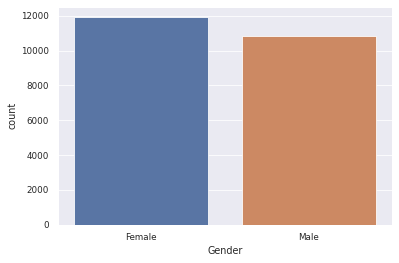

In [31]:
sns.countplot(x = "Gender", data = raw_employee_df);